## Name: Solmaz Seyed Monir, Guanyu Li

# Project1: Titanic (Classification)

## 2.2Problem Formulation/Introduction [5 points]
At the beginning of your notebook, you are required to write an introduction of the problem, which will motivate the readers.

#### 1. You need to carefully read the description of your chosen Kaggle competition and formulate the data problem you are going to solve similar to what we have discussed in class. Points will be deducted if the problem is not correctly describing the corresponding Kaggle problem or the problem formulation is not clear to understand even judge the previous point. [3 points]

#### 2. According to the problem, what's the data population? [2 points]

Titanic (Classification)
The sinking of the Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, the widely considered “unsinkable” Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone on board, resulting in the death of 1502 out of 2224 passengers and crew.
<br>Goal: Build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data like age, gender, class. How to deal with the data, how to analyze data through different plots and graphs, how to do data preprocessing, and finally how to predict things. we need to predict whether the other 418 passengers on board survived.

Data population: 891 passengers of the Titanic shipwreck whose life status has been known, and 418 passengers that we don't know if they survived in the Titanic.

## 2.3 Data [38 points]

#### 1. If you don't have a Kaggle account, you need to register one. Please include your account name in your notebook, which will be the one showing on the Leaderboard, when you submit your result in stage-2. [1 point]

        solmazsm 
        GUGUGU

#### 2. After you download the data, you need to load them to your notebook, show several lines of each separate file and describe what is that data for. [5 points]

* Each row represents the data of 1 passenger.
* Columns represent the features. We have 10 features/ variables in this dataset.
* Survival: This variable shows whether the person survived or not. This is our target variable & we have to predict its value. It’s a binary variable. 0 means not survived and 1 means survived.
* pclass: The ticket class of passengers. 1st  (upper class), 2nd (middle), or 3rd (lower).
* Sex: Gender of passenger
* Age: Age (in years) of a passenger
* sibsp: The no. of siblings/spouses of a particular passenger who were there on the ship.
* parch: The no. of parents/children of a particular passenger who were there on the ship.
* ticket: Ticket Number
* fare: Passenger fare (like 1st class ticket fare must be greater than 2nd pr 3rd class ticket right)
* cabin: Cabin Number
* embarked: Port of Embarkation; From where that passenger took the ship. ( C = Cherbourg, Q = Queenstown, S = Southampton)

Clearly, it’s a classification problem because we need to tell whether the person will survive or not. We will use 5 different classifiers and compare their accuracy. The 5 different classifiers are as follows:

## Show the data

In [38]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
%matplotlib inline

titani_data_train=pd.read_csv('data/train.csv', delimiter=',')
titani_data_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [39]:
titani_data_train.shape

(891, 12)

In [40]:
titani_data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [41]:
titani_data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Show the data (test data set)

In [42]:
titani_data_test=pd.read_csv('data/test.csv', delimiter=',')
titani_data_test

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [43]:
titani_data_test.shape

(891, 12)

In [44]:
titani_data_test.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [45]:
titani_data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### 3.  Data Wrangling: this is an open component and you need to transform the data into a data frame or data frames for analysis or visualization. However, you need to include the discussion for each data properties (i.e., structure, granularity, scope, temporality, and faithfulness), using the data (e.g., visualizations or statistical summaries) as evidences. If one property cannot be identified using the data, you also need to show and tell that this is not available. [25 points, 5 for each property]

* **Structure** -- the "shape" of a data file
* **Granularity** -- how fine/coarse is each datum
* **Scope** -- how (in)complete is the data
* **Temporality** -- how is the data situated in time
* **Faithfulness** -- how well does the data capture "reality"

## Structure: the “shape” of a data file
The train dataset and test dataset are all tabular data. For train dataset, we have 891 rows and 12 columns. For test dataset, we have 418 rows and 11 columns. The column names in test data and train data are same except that train data has “ground truth” for each passenger which is called "Survived" and test data doesn't.

In [46]:
print('Shape of train data', titani_data_train.shape)
print('Shape of test data', titani_data_test.shape)

Shape of train data (891, 12)
Shape of test data (891, 12)


## Granularity: how fine/coarse is each datum Ø Scope
 The raw data records each passenger on Titanic. We are interested in what are the relationship in "Pclass", "Sex", and "Survived". 
 

In [79]:
 titani_data_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

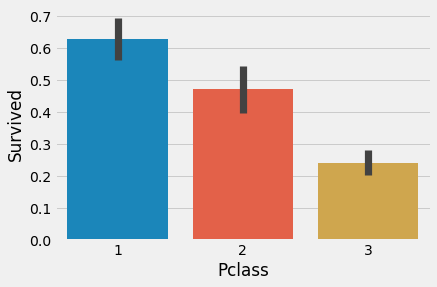

In [80]:
sns.barplot(x='Pclass', y='Survived', data=titani_data_train)

In [81]:
titani_data_train[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


<AxesSubplot:xlabel='Sex', ylabel='Survived'>

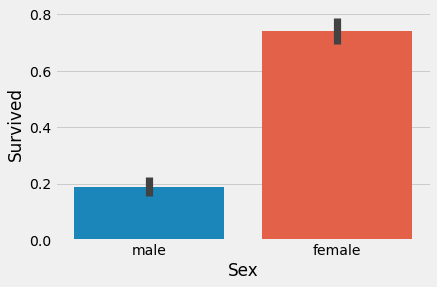

In [82]:
import seaborn as sns
sns.barplot(x='Sex', y='Survived', data=titani_data_train)

In [1]:
train_pclass = titani_data_train.groupby('Pclass').size().reset_index(name='Num')
train_pclass['ticket_class'] = ['first', 'second', 'third']
train_pclass

NameError: name 'titani_data_train' is not defined

In [84]:
titani_data_train["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

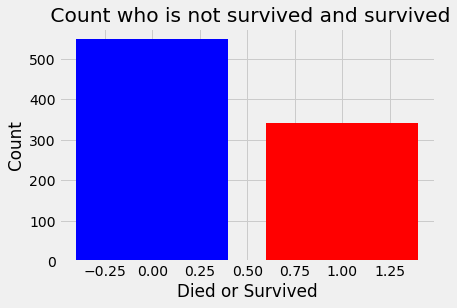

0 means not survived and 1 means survived


In [104]:
plt.bar(list(titani_data_train["Survived"].value_counts().keys()),list(titani_data_train["Survived"].value_counts()),color= ['b','r'])
plt.ylabel("Count")
plt.xlabel("Died or Survived")
plt.title(" Count who is not survived and survived")
plt.show()
print("0 means not survived and 1 means survived")

## Scope: how (in)complete is the data
* For the train data:
             age   79.58
             sibsp 8
             parch 6
             fare  512.33
* For the test data: 
             age   75.83
             sibsp 8
             parch 9
             fare  512.33

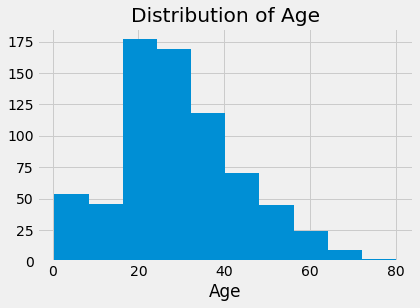

Scope of Age:  79.58


In [103]:
plt.hist(titani_data_train['Age'])
plt.title("Distribution of Age")
plt.xlabel('Age')
plt.show()
print('Scope of Age: ', titani_data_train['Age'].max() - titani_data_train['Age'].min())

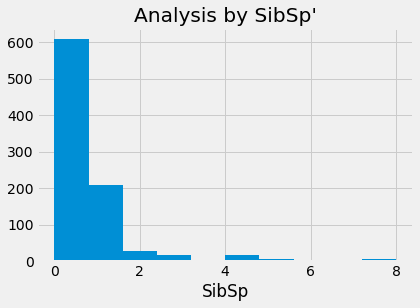

Scope of SibSp:  8


In [91]:
plt.hist(titani_data_train['SibSp'])
plt.title("Analysis by SibSp'")
plt.xlabel('SibSp')
plt.show()
print('Scope of SibSp: ',titani_data_train['SibSp'].max() - titani_data_train['SibSp'].min())

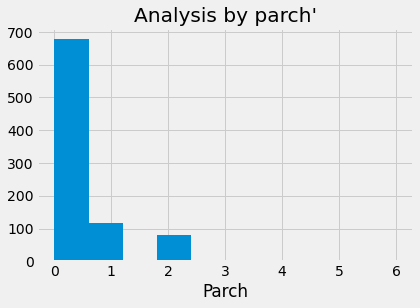

Scope of SibSp:  8


In [90]:
plt.hist(titani_data_train['Parch'])
plt.title("Analysis by parch'")
plt.xlabel('Parch')
plt.show()


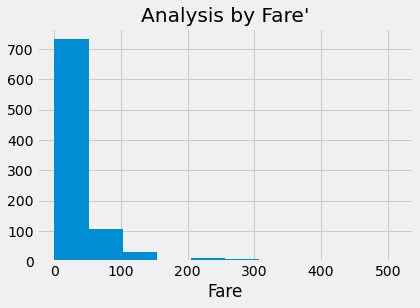

Scope of Fare:  512.3292


In [99]:
plt.hist(titani_data_train['Fare'])
plt.title("Analysis by Fare'")
plt.xlabel('Fare')
plt.show()
print('Scope of Fare: ', titani_data_train['Fare'].max() - titani_data_train['Fare'].min())

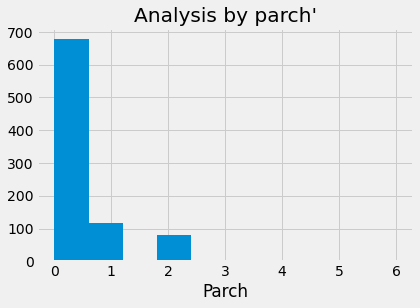

Scope of Parch:  6


In [92]:
plt.hist(titani_data_test['Parch'])
plt.title("Analysis by parch'")
plt.xlabel('Parch')
plt.show()
print('Scope of Parch: ', titani_data_train['Parch'].max() - titani_data_train['Parch'].min())

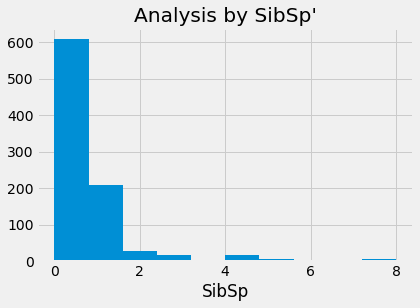

Scope of SibSp:  8


In [102]:
plt.hist(titani_data_test['SibSp'])
plt.title("Analysis by SibSp'")
plt.xlabel('SibSp')
plt.show()
print('Scope of SibSp: ', titani_data_test['SibSp'].max() - titani_data_test['SibSp'].min())

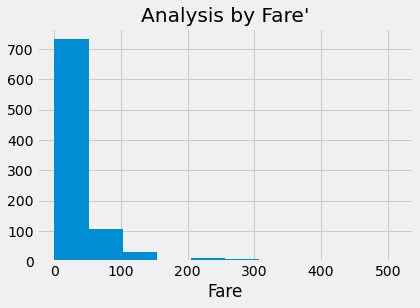

Scope of Fare:  512.3292


In [101]:
plt.hist(titani_data_test['Fare'])
plt.title("Analysis by Fare'")
plt.xlabel('Fare')
plt.show()
print('Scope of Fare: ', titani_data_test['Fare'].max() - titani_data_test['Fare'].min())

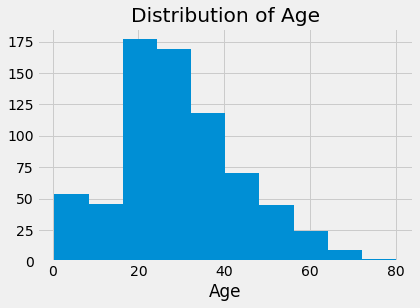

Scope of Age:  79.58


In [100]:
plt.hist(titani_data_test['Age'])
plt.title("Distribution of Age")
plt.xlabel('Age')
plt.show()
print('Scope of Age: ', titani_data_test['Age'].max() - titani_data_test['Age'].min())

## Temporality:  how is the data situated in time

The data does not include time features, so I think this property cannot be identified.

## Faithfulness:

Combining the analysis of train data and test data. The ranges looks very good that the train data and test data share the same range of age, sibsp, parch and fare.

In [115]:
print("Train Data:")
print('Range of Age: ', titani_data_train['Age'].min(), "-", titani_data_train['Age'].max())
print('Range of SibSp: ', titani_data_train['SibSp'].min(), "-",  titani_data_train['SibSp'].max())
print('Range of Parch: ', titani_data_train['Parch'].min(), "-",  titani_data_train['Parch'].max())
print('Range of Fare: ', titani_data_train['Fare'].min(), "-",  titani_data_train['Fare'].max())
print("\nTest Data:")
print('Range of Age: ', titani_data_test['Age'].min(), "-", titani_data_test['Age'].max())
print('Range of SibSp: ', titani_data_test['SibSp'].min(), "-",  titani_data_test['SibSp'].max())
print('Range of Parch: ', titani_data_test['Parch'].min(), "-",  titani_data_test['Parch'].max())
print('Range of Fare: ', titani_data_test['Fare'].min(), "-",  titani_data_test['Fare'].max())

Train Data:
Range of Age:  0.42 - 80.0
Range of SibSp:  0 - 8
Range of Parch:  0 - 6
Range of Fare:  0.0 - 512.3292

Test Data:
Range of Age:  0.42 - 80.0
Range of SibSp:  0 - 8
Range of Parch:  0 - 6
Range of Fare:  0.0 - 512.3292


#### 4. According to the data wrangling (maybe some visualizations), is the data obtained representative for the problem according to your data population? What kind of assumptions are needed that the analysis using the current data can solve the problem? [5 points]

* Scope of the age, SibSp, Parch is bigger enough and the data distribution is reasonable, such as Pclass and Sex.
* Assumptions: All the information in the data is real and correct.

#### 5. Comparing the data population and the given data, guess what kind of sampling method maybe used during the data collection and why do you guess so. [2 points]

* Using statitstics functions for data collection. 
* Categorical: Survived, Sex, and Embarked. Ordinal: Pclass.
* Total samples are 891 or 40% of the actual number of passengers on board the Titanic (2,224).
* Ticket class. 1 stands for First class ticket. 2 stands for Second class ticket. 3 stands for Third class ticket.